# Imports

In [1]:
import pandas as pd
import numpy as np

import networkx as nx

from karateclub import DeepWalk 
from karateclub import Node2Vec

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# !jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

## Load `e_coli_core` from cobra for reference

In [3]:
from cobra.io import load_model

model = load_model('textbook')

## Load edge list file

In [4]:
path_to_file = 'reactions_from_json for RDF - edge_list.csv'

path_to_file = 'edge_list.csv'

df = pd.read_csv(path_to_file)
df.columns = ['source', 'target']

df

,source,target
0,13dpg_c,PGK
1,13dpg_c,GAPD
2,2pg_c,PGM
3,2pg_c,ENO
4,3pg_c,PGK
...,...,...
267,TKT2,e4p_c
268,TKT2,g3p_c
269,TKT2,f6p_c
270,TPI,g3p_c


## Create Graph from `edge_list`

In [5]:
G = nx.from_pandas_edgelist(df, source='source', target='target',
                           create_using=nx.DiGraph)
print(G.is_directed())

print(G.number_of_edges())
print(G.number_of_nodes())

True
272
144


In [6]:
G.nodes

NodeView(('13dpg_c', 'PGK', 'GAPD', '2pg_c', 'PGM', 'ENO', '3pg_c', '6pgc_c', 'GND', '6pgl_c', 'G6PDH2r', 'PGL', 'ac_c', 'ACKr', 'ACt2r', 'ac_e', 'EX_ac_e', 'acald_c', 'ACALDt', 'ACALD', 'ALCD2x', 'acald_e', 'EX_acald_e', 'accoa_c', 'CS', 'PTAr', 'MALS', 'acon_C_c', 'ACONTa', 'ACONTb', 'actp_c', 'akg_c', 'GLUSy', 'ICDHyr', 'AKGt2r', 'GLUDy', 'AKGDH', 'akg_e', 'EX_akg_e', 'cit_c', 'co2_c', 'CO2t', 'PPC', 'co2_e', 'EX_co2_e', 'coa_c', 'PDH', 'PFL', 'SUCOAS', 'dhap_c', 'FBA', 'TPI', 'e4p_c', 'TALA', 'TKT2', 'etoh_c', 'ETOHt2r', 'etoh_e', 'EX_etoh_e', 'f6p_c', 'PFK', 'PGI', 'fdp_c', 'FBP', 'for_c', 'FORt', 'for_e', 'FORt2', 'EX_for_e', 'fru_e', 'FRUpts2', 'EX_fru_e', 'fum_c', 'FUM', 'FRD7', 'fum_e', 'FUMt2_2', 'EX_fum_e', 'g3p_c', 'TKT1', 'g6p_c', 'glc__D_e', 'GLCpts', 'EX_glc__D_e', 'gln__L_c', 'GLUN', 'gln__L_e', 'EX_gln__L_e', 'GLNabc', 'glu__L_c', 'GLNS', 'GLUt2r', 'glu__L_e', 'EX_glu__L_e', 'glx_c', 'h2o_e', 'EX_h2o_e', 'H2Ot', 'icit_c', 'ICL', 'lac__D_c', 'D_LACt2', 'LDH_D', 'lac__D_

In [7]:
shortest_path = nx.shortest_path(G, source='glc__D_e', target='succ_c') 
print(shortest_path)

['glc__D_e', 'GLCpts', 'pyr_c', 'PDH', 'co2_c', 'ICDHyr', 'icit_c', 'ICL', 'succ_c']


In [8]:
paths = nx.all_simple_paths(G, source='glc__D_e', target='succ_c') 

In [9]:
for i in paths:
    i

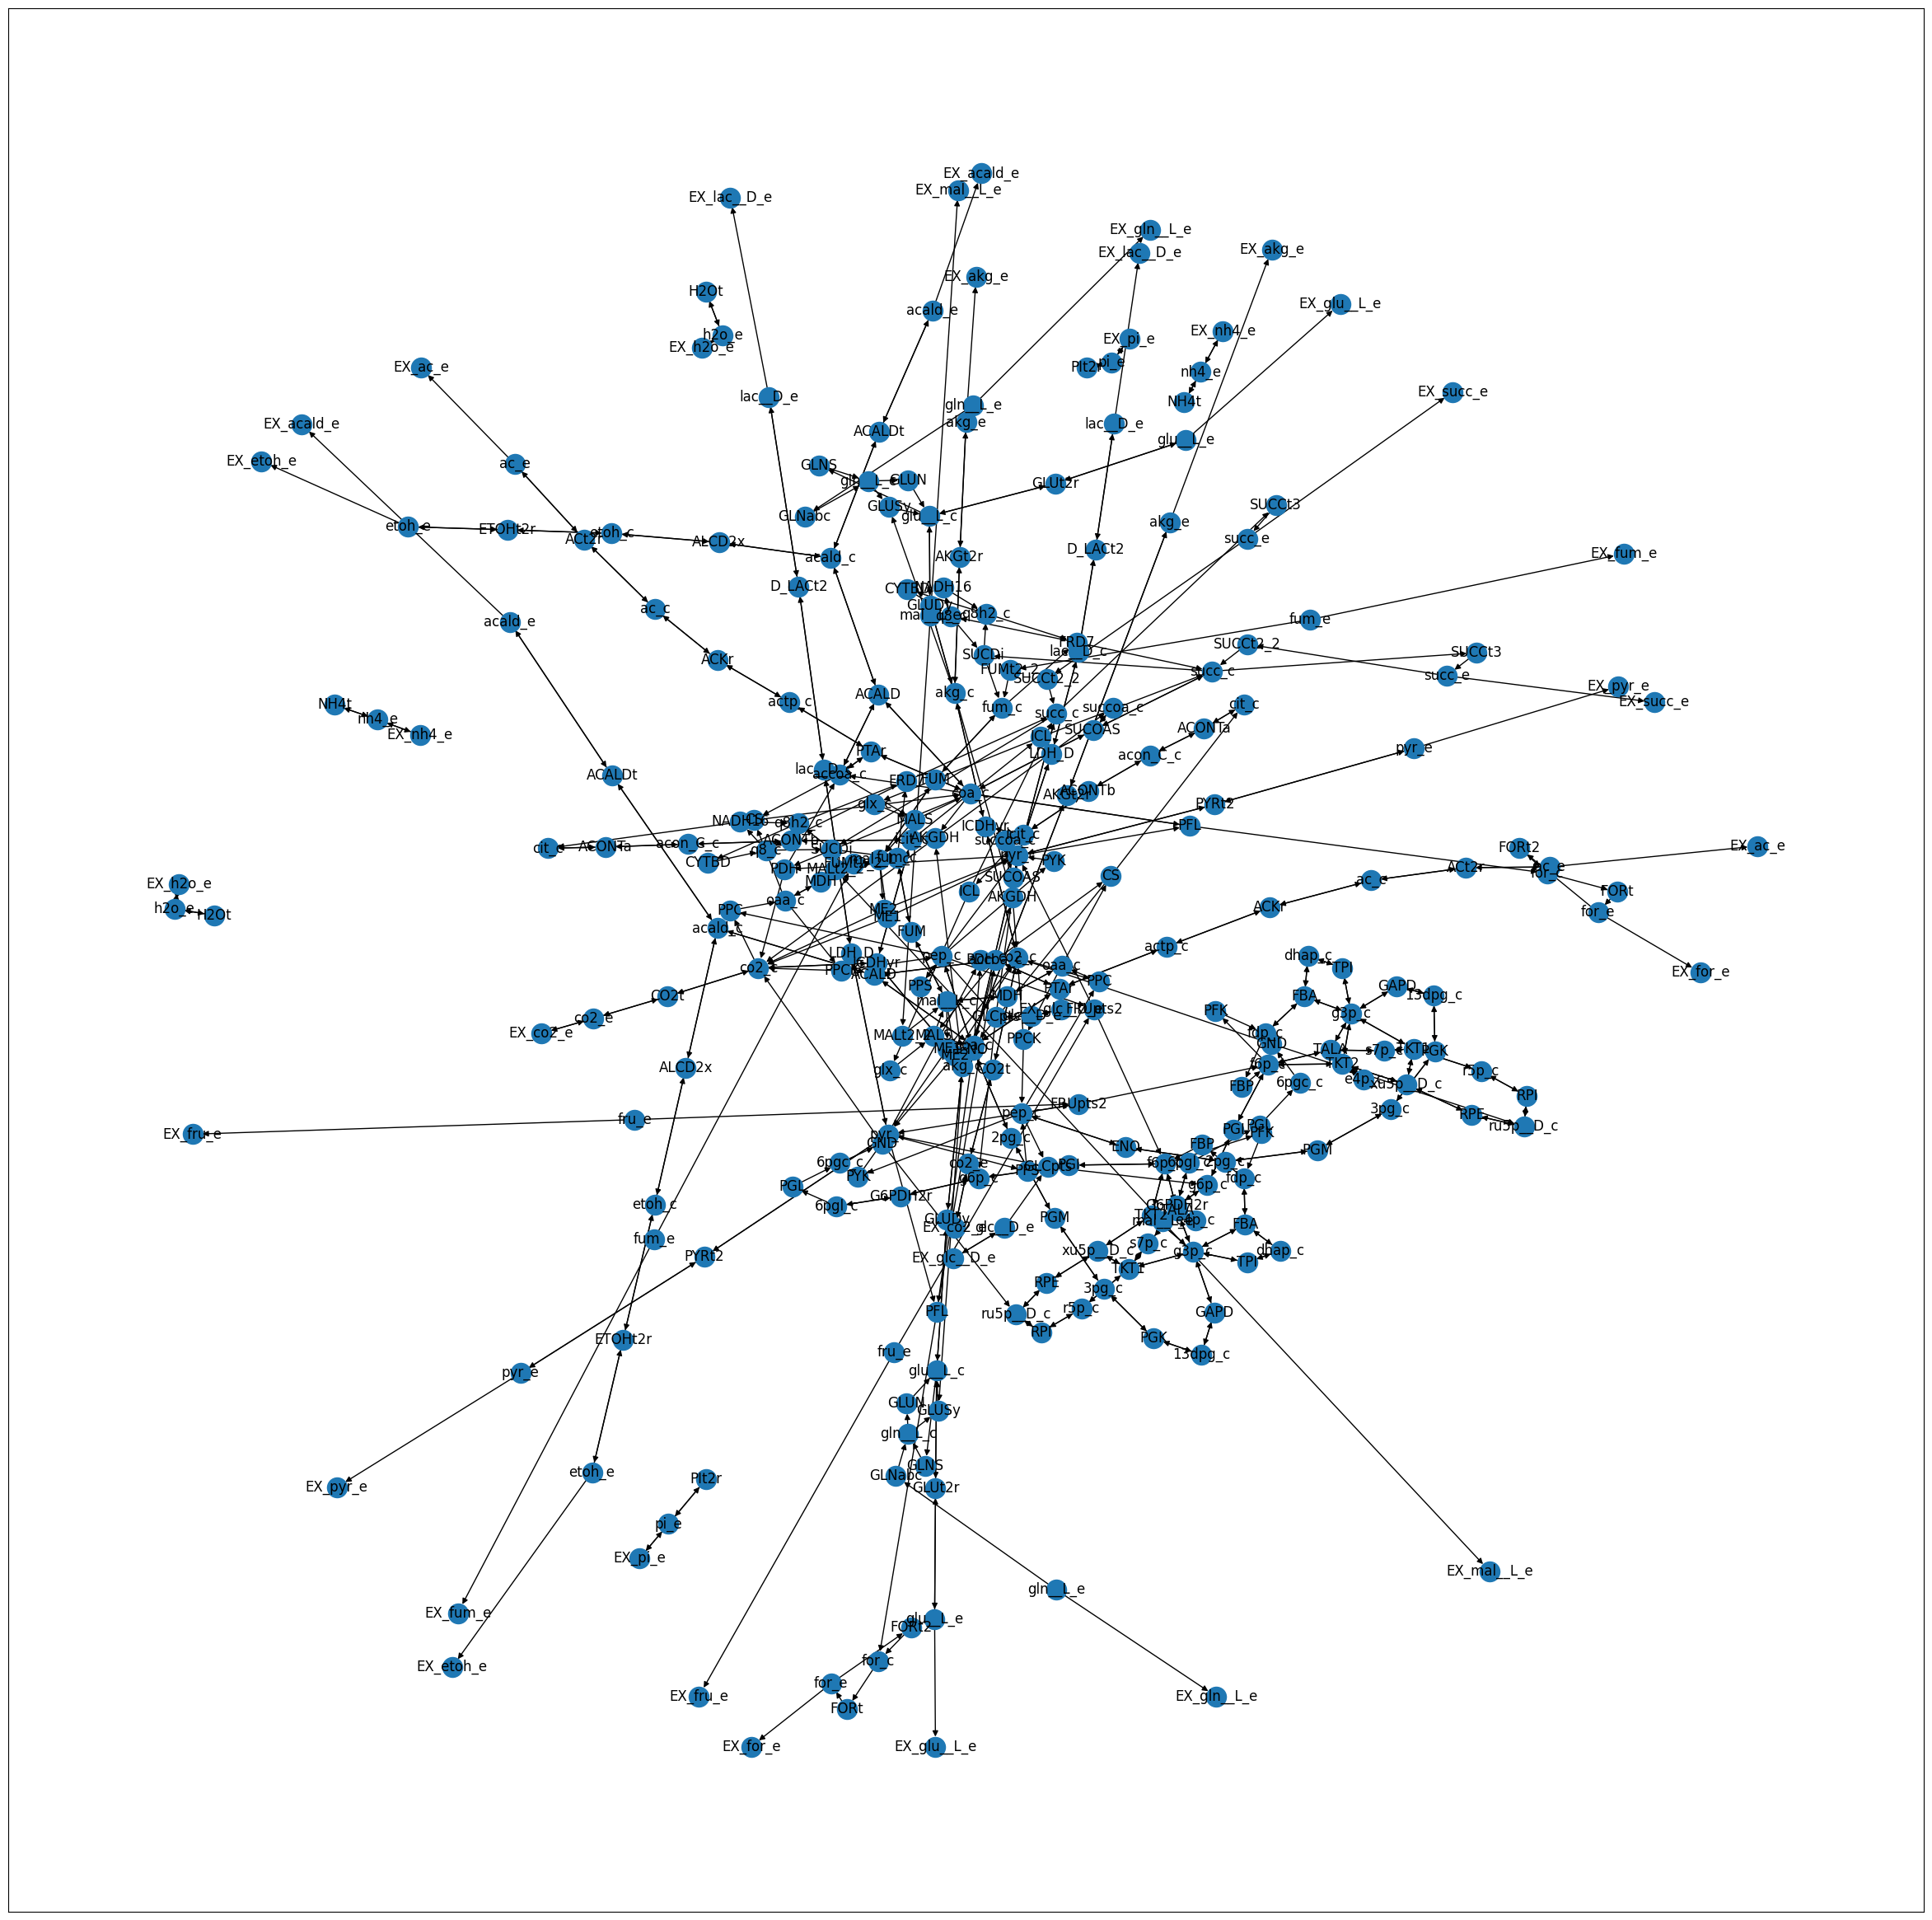

In [10]:
plt.figure(figsize=(30,30))
pos = nx.draw_networkx(G)
nx.draw_networkx(G, pos)

In [40]:
fba = model.optimize()

In [42]:
fba = pd.DataFrame(fba.fluxes)
fba[fba['fluxes'] == 0]

,fluxes
PFL,0.0
ACALD,0.0
AKGt2r,0.0
ALCD2x,0.0
ACALDt,0.0
ACKr,0.0
PPCK,0.0
ACt2r,0.0
PPS,0.0
ADK1,0.0


In [18]:
kinetic_param = pd.read_csv('kinetic_parameters_yeast.csv')
kinetic_param.drop('Unnamed: 0', axis=1, inplace=True)
kinetic_param

,Gamma_AATA,Gamma_IPPS,Gamma_IPPSm,Gamma_DHQTi,Gamma_ADCS,Gamma_ABTA,Gamma_PGL,Gamma_ACACT1r,Gamma_ACOAHim,Gamma_ACOTAim,...,sigma_km_product_ccm2tp,sigma_km_substrate_pca2tp,sigma_km_product_pca2tp,sigma_km_substrate_r2073_1,sigma_km_product_r2073_1,sigma_km_substrate1_r_4235,sigma_km_product1_r_4235,sigma_km_substrate2_r_4235,sigma_km_product2_r_4235,Stability
0,0.072899,0.005997,7.820000e-15,0.006337,4.840000e-08,0.976899,0.081794,0.906322,5.030000e-12,0.198783,...,0.333927,0.112272,0.241996,0.580106,0.658892,0.950488,0.214360,0.271523,0.527818,1
1,0.072899,0.005997,7.820000e-15,0.006337,4.840000e-08,0.976899,0.081794,0.906322,5.030000e-12,0.198783,...,0.693616,0.302981,0.761936,0.059439,0.938477,0.722462,0.442469,0.426947,0.517426,0
2,0.071643,0.006483,3.750000e-15,0.006192,4.870000e-08,0.976932,0.089406,0.906766,3.250000e-12,0.200557,...,0.333927,0.112272,0.241996,0.580106,0.658892,0.950488,0.214360,0.271523,0.527818,0
3,0.071643,0.006483,3.750000e-15,0.006192,4.870000e-08,0.976932,0.089406,0.906766,3.250000e-12,0.200557,...,0.693616,0.302981,0.761936,0.059439,0.938477,0.722462,0.442469,0.426947,0.517426,1
4,0.071643,0.006483,3.750000e-15,0.006192,4.870000e-08,0.976932,0.089406,0.906766,3.250000e-12,0.200557,...,0.964839,0.621527,0.186161,0.501618,0.174918,0.225770,0.511021,0.777094,0.840152,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0.536932,0.000364,1.190000e-09,0.014111,9.810000e-10,0.957688,0.043586,0.983649,6.240000e-10,0.597519,...,0.566805,0.230840,0.643634,0.190997,0.481981,0.831286,0.175473,0.886912,0.776614,1
368,0.536932,0.000364,1.190000e-09,0.014111,9.810000e-10,0.957688,0.043586,0.983649,6.240000e-10,0.597519,...,0.929774,0.818844,0.913258,0.038042,0.204282,0.554238,0.460678,0.404732,0.234195,1
369,0.536932,0.000364,1.190000e-09,0.014111,9.810000e-10,0.957688,0.043586,0.983649,6.240000e-10,0.597519,...,0.888972,0.768151,0.204500,0.074194,0.830815,0.014135,0.023336,0.761746,0.866801,0
370,0.536932,0.000364,1.190000e-09,0.014111,9.810000e-10,0.957688,0.043586,0.983649,6.240000e-10,0.597519,...,0.979293,0.236899,0.237154,0.340540,0.140314,0.656176,0.100978,0.565236,0.899289,1


In [19]:
kinetic_param.columns

Index(['Gamma_AATA', 'Gamma_IPPS', 'Gamma_IPPSm', 'Gamma_DHQTi', 'Gamma_ADCS',
       'Gamma_ABTA', 'Gamma_PGL', 'Gamma_ACACT1r', 'Gamma_ACOAHim',
       'Gamma_ACOTAim',
       ...
       'sigma_km_product_ccm2tp', 'sigma_km_substrate_pca2tp',
       'sigma_km_product_pca2tp', 'sigma_km_substrate_r2073_1',
       'sigma_km_product_r2073_1', 'sigma_km_substrate1_r_4235',
       'sigma_km_product1_r_4235', 'sigma_km_substrate2_r_4235',
       'sigma_km_product2_r_4235', 'Stability'],
      dtype='object', length=1411)

In [22]:
filter_col = [col for col in kinetic_param if col.startswith('Gamma_')]
len(filter_col)

314